In [11]:
!pip install -q tensorflow

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import pandas as pd


In [12]:
tf_version = tf.__version__
print(tf_version)

2.17.1


In [13]:
%load_ext tensorboard

In [14]:
longdir='long'

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))


model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=longdir, histogram_freq=1)



In [23]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8963 - loss: 0.3342 - val_accuracy: 0.9834 - val_loss: 0.0503
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9872 - val_loss: 0.0368
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9909 - loss: 0.0293 - val_accuracy: 0.9873 - val_loss: 0.0410
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9893 - val_loss: 0.0349
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9943 - loss: 0.0166 - val_accuracy: 0.9927 - val_loss: 0.0248


In [25]:
y_true = test_labels
y_pred = np.argmax(model1.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [26]:
classes=[0,1,2,3,4,5,6,7,8,9]

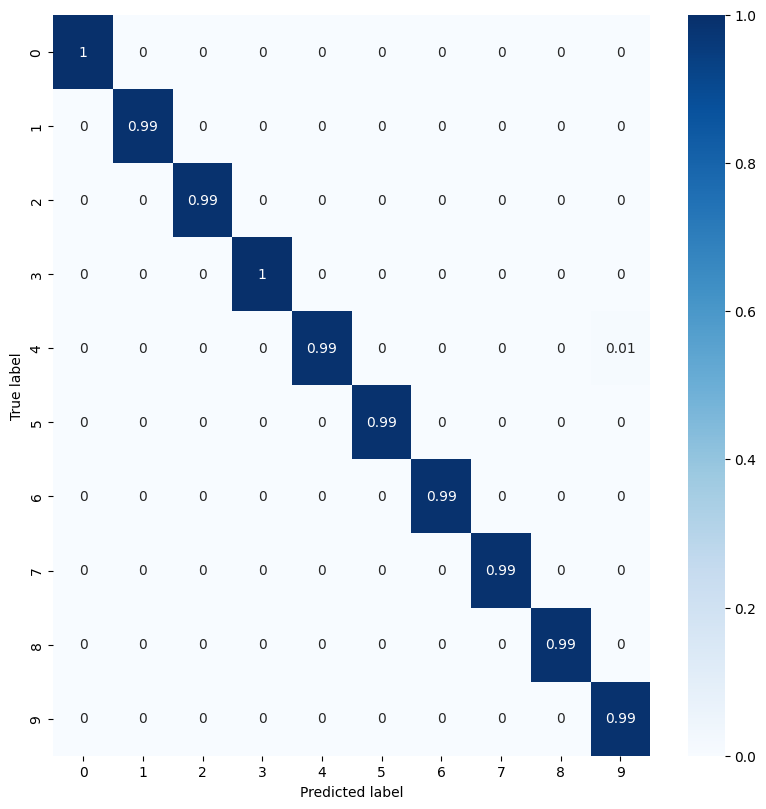

In [27]:
com_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
com_mat_norm = np.around(com_mat.astype('float') / com_mat.sum(axis=1)[:, np.newaxis], decimals=2)

com_mat_df = pd.DataFrame(com_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(com_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
